In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_19458/1296899208.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [32]:
traffic = pd.read_csv('/Users/tonymoceri/MSBDSA/personal_projects-1/datasets/traffic.csv')

In [33]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [34]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [36]:
# Let's convert  the temperature from Kelvin to Fahrenheit
traffic['temp'] = (traffic['temp'] - 273.15) * 9/5 + 32

In [37]:
# Histogram of traffic volume with date_time on x-axis. Make sure to convert date_time to datetime object
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# Create a new column to indicate if the date_time is a weekday or weekend 
traffic['weekday'] = traffic['date_time'].dt.dayofweek
traffic['weekday'] = traffic['weekday'].apply(lambda x: 1 if x < 5 else 0)

# Create a new column to indicate if the date_time is in the morning, afternoon, evening, or night
traffic['hour'] = traffic['date_time'].dt.hour
traffic['hour'] = traffic['hour'].apply(lambda x: 'morning' if 6<=x<12 else ('afternoon' if 12<=x<18 else ('evening' if 18<=x<24 else 'night')))
traffic['hour'].value_counts()

hour
morning      12294
night        12284
evening      11942
afternoon    11684
Name: count, dtype: int64

## Time of Day 

<Axes: title={'center': 'traffic_volume'}, xlabel='hour'>

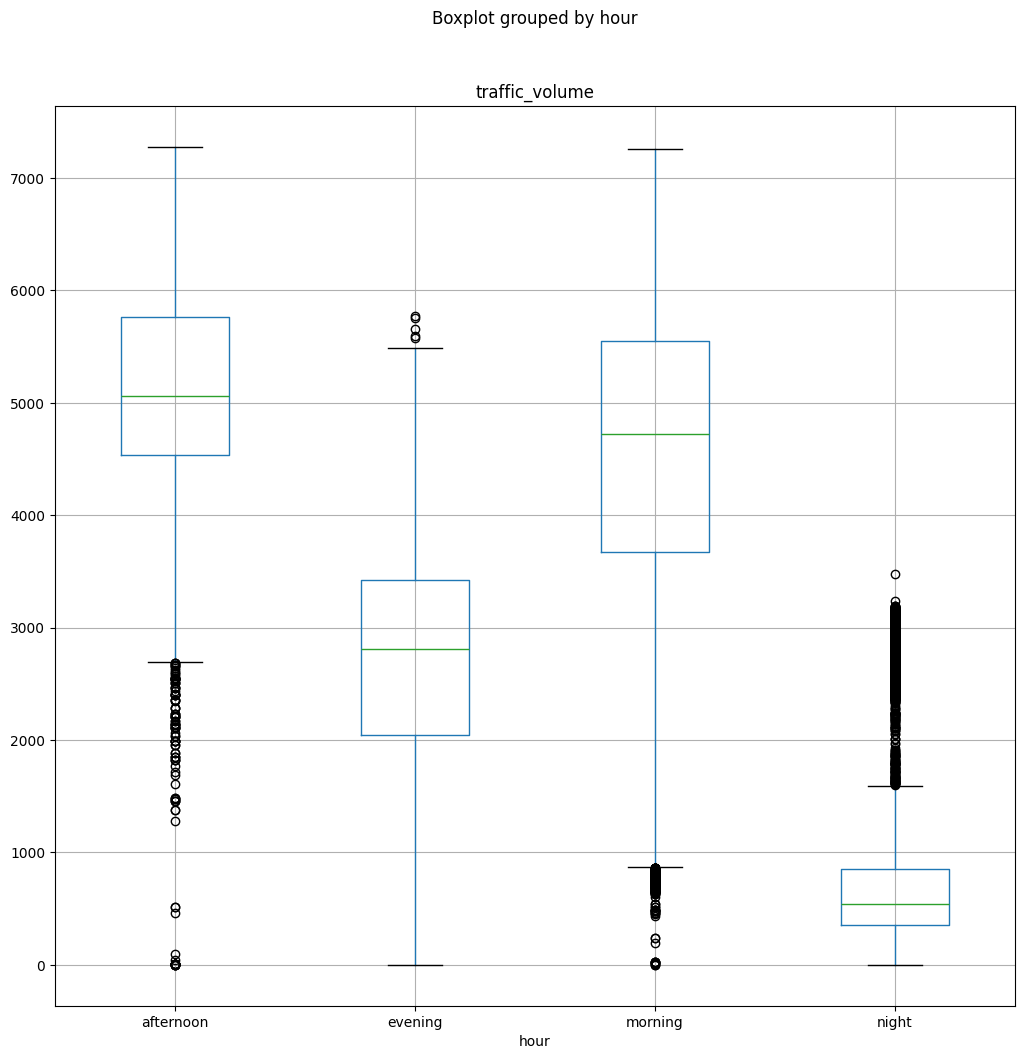

In [38]:
# Plot the histogram and boxplot of traffic volume by hour
traffic.boxplot(column='traffic_volume', by='hour', figsize=(12,12))

### And also by weekend/weekday

<Axes: title={'center': 'traffic_volume'}, xlabel='weekday'>

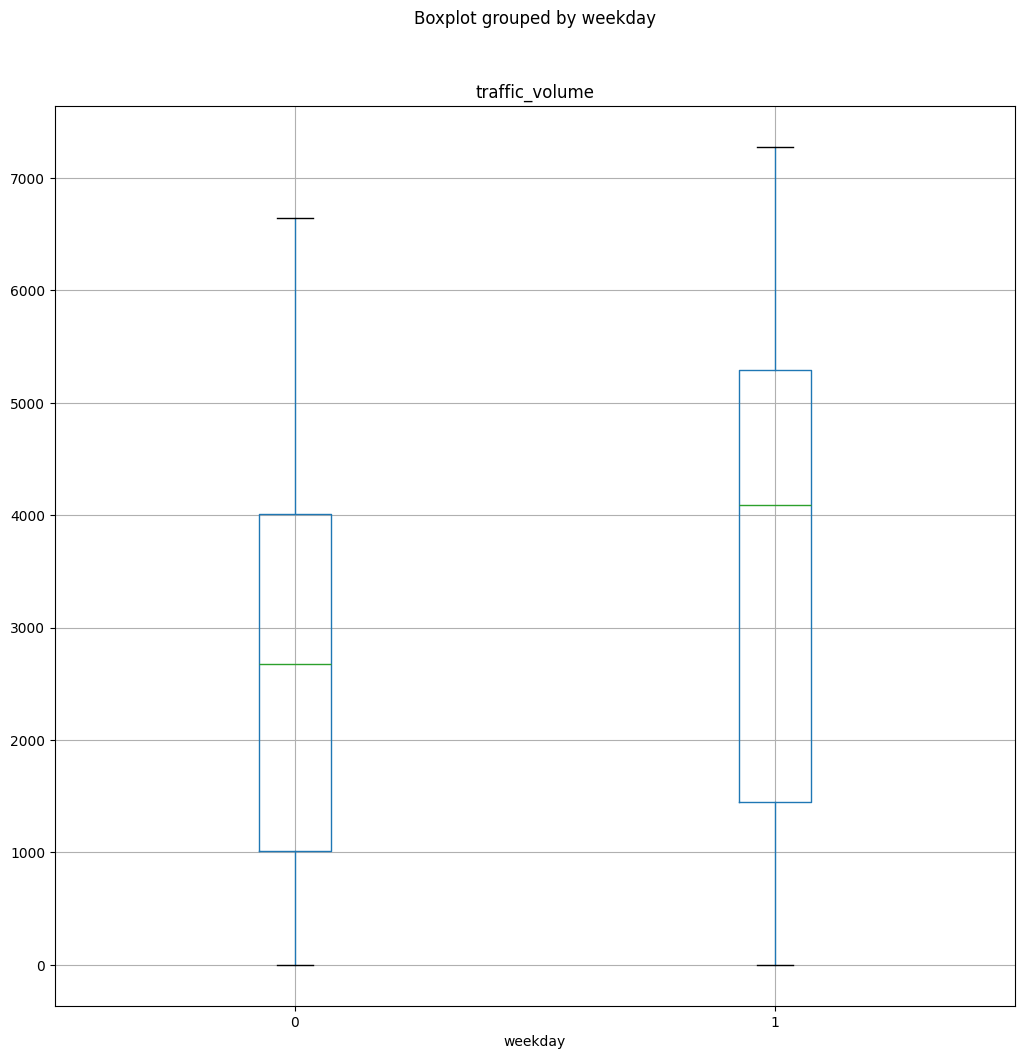

In [39]:
# Boxplot of traffic volume by weekday/weekend
traffic.boxplot(column='traffic_volume', by='weekday', figsize=(12,12))

In [40]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [41]:
# Let's create a new variable called "rush_hour". If the date_time is between 6:00 AM and 9:00 AM, or 3:00 PM and 6:00 PM the value in the corresponding row of "rush_hour" is 1, and 0 otherwise
traffic['rush_hour'] = traffic['date_time'].apply(lambda x: 1 if (x.hour >= 6 and x.hour < 9) or (x.hour >= 15 and x.hour < 18) else 0)

# Let's create a new variable called "daylight". If the date_time is between 7:00 AM and 8:00 PM the value in the corresponding row of "daylight" is 1, and 0 otherwise
traffic['daylight'] = traffic['date_time'].apply(lambda x: 1 if (x.hour >= 7 and x.hour < 20) else 0)


In [42]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,rush_hour,daylight
0,NaN,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,morning,0,1
1,NaN,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,morning,0,1
2,NaN,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,morning,0,1
3,NaN,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,afternoon,0,1
4,NaN,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,afternoon,0,1


<Axes: xlabel='month'>

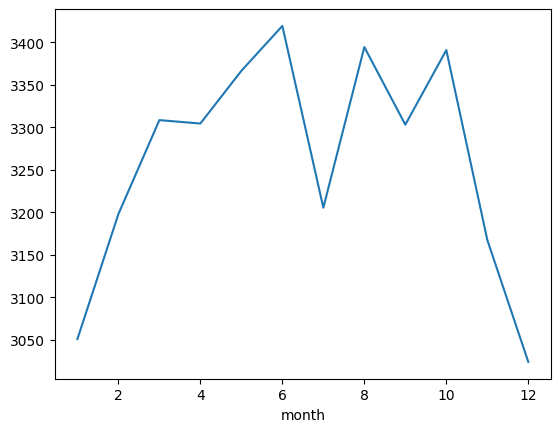

In [43]:
# let's look at seasonality. How does traffic volume change by month?
traffic['month'] = traffic['date_time'].dt.month

# Let's plot this 
traffic.groupby('month')['traffic_volume'].mean().plot()


<Axes: xlabel='year'>

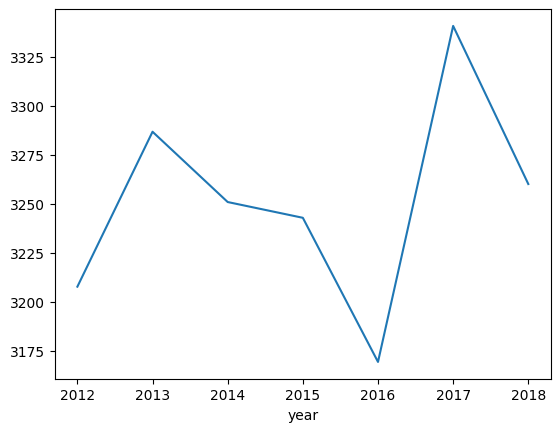

In [44]:
# Let's also see if traffic volume changes throughout the year
traffic['year'] = traffic['date_time'].dt.year

# Let's plot this
traffic.groupby('year')['traffic_volume'].mean().plot()

<Axes: xlabel='day_of_week'>

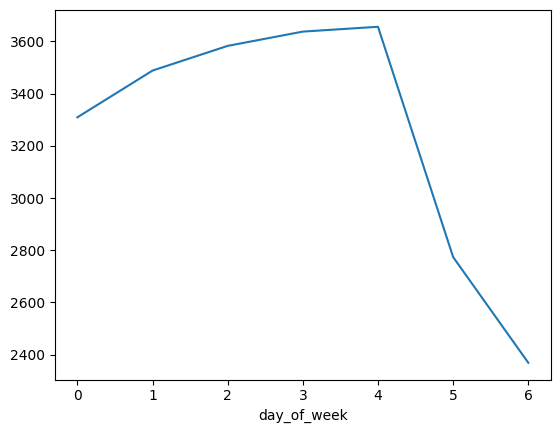

In [45]:
# Finally, let's look at day of the week (0 = Monday, 6 = Sunday)
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek

# Let's plot this
traffic.groupby('day_of_week')['traffic_volume'].mean().plot()

<Axes: title={'center': 'traffic_volume'}, xlabel='rush_hour'>

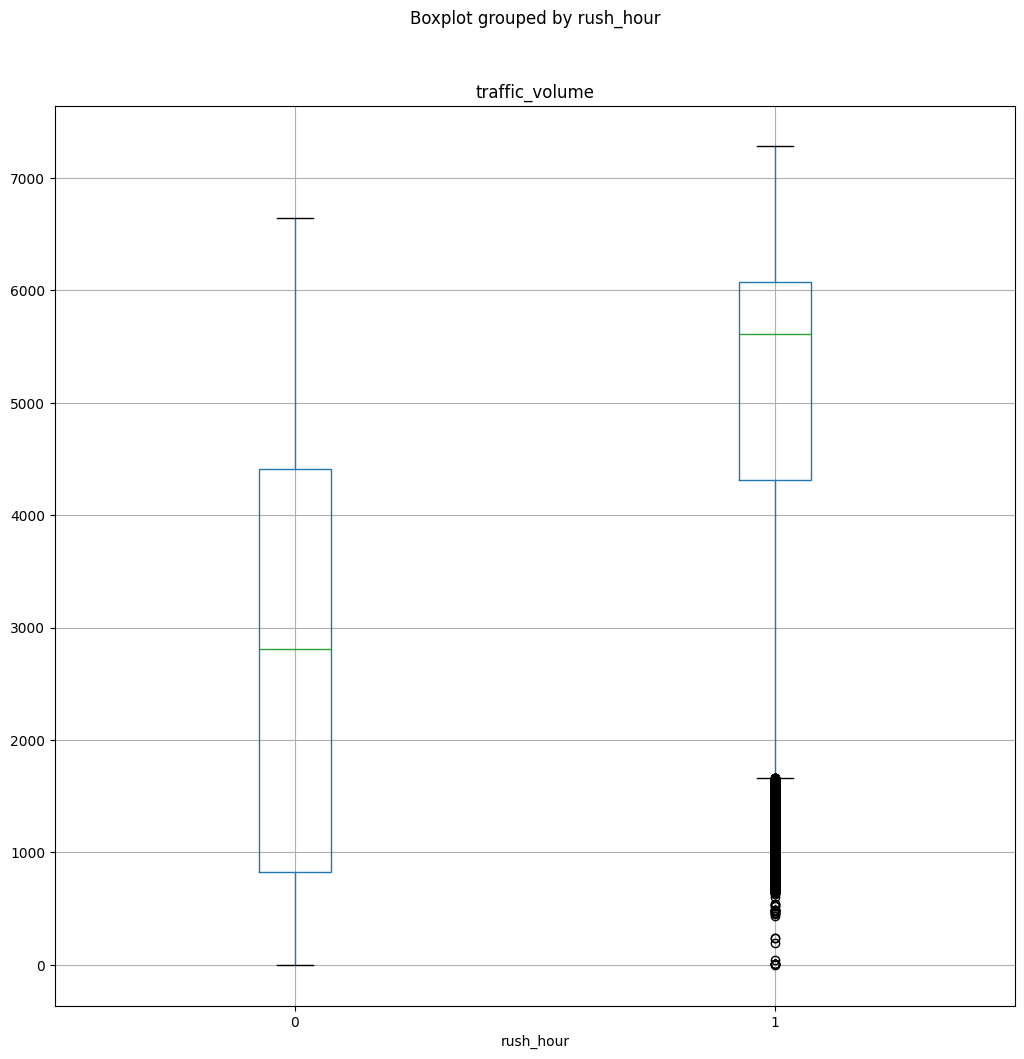

In [46]:
# Let's look at a boxplot of traffic volume during rush hour vs. non-rush hour
traffic.boxplot(column='traffic_volume', by='rush_hour', figsize=(12,12))

<Axes: title={'center': 'traffic_volume'}, xlabel='daylight'>

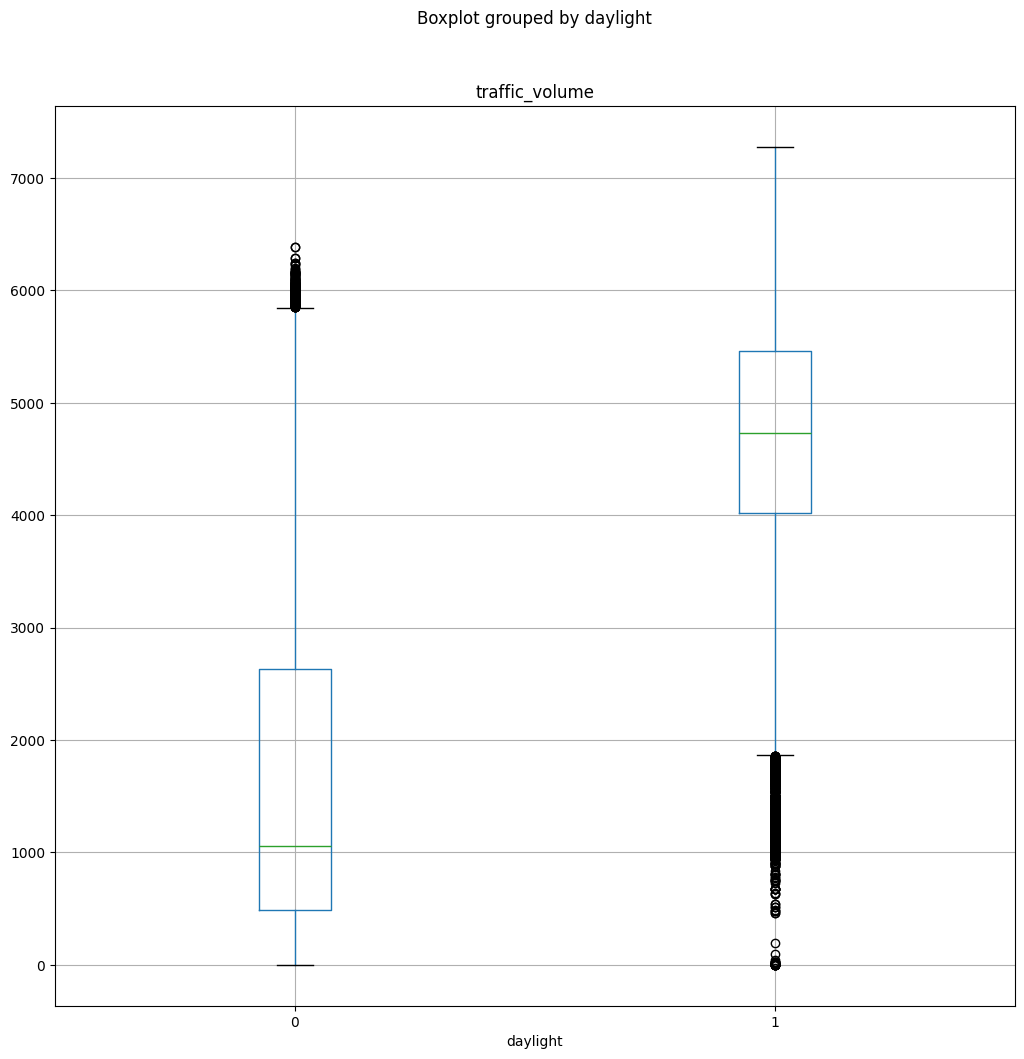

In [47]:
# And traffic volume during daylight vs. non-daylight
traffic.boxplot(column='traffic_volume', by='daylight', figsize=(12,12))

## Weather 

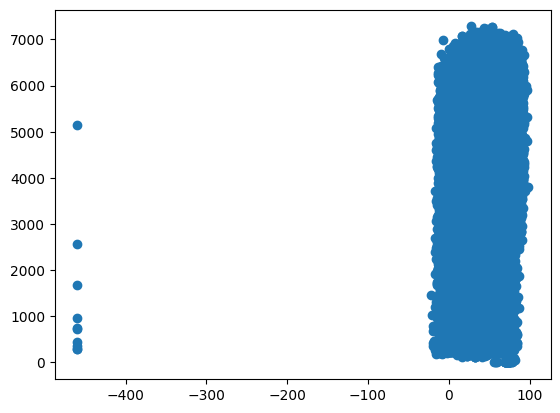

In [48]:
# Let's look at a scatterplot of traffic volume vs. temperature
plt.scatter(traffic['temp'], traffic['traffic_volume'])

In [52]:
traffic['temp'].sort_values().head(40)

11946   -459.670
11947   -459.670
11948   -459.670
11949   -459.670
11950   -459.670
11951   -459.670
11901   -459.670
11900   -459.670
11899   -459.670
11898   -459.670
29252    -21.568
29251    -21.154
29250    -20.074
3293     -18.994
3292     -18.994
3294     -18.994
29249    -18.868
29248    -17.554
3296     -17.410
3297     -17.410
3295     -17.410
3291     -16.798
11807    -16.600
40240    -16.600
11829    -16.402
40239    -16.222
11825    -16.186
11827    -16.168
11830    -16.168
11831    -16.168
3118     -16.024
3120     -16.024
3119     -16.024
12625    -15.934
11828    -15.934
29247    -15.790
11824    -15.718
11806    -15.700
40241    -15.646
29253    -15.538
Name: temp, dtype: float64

In [53]:
# We can see by this that there are some outliers in the temperature data. Let's remove any rows where the temperature is below -22 degrees Fahrenheit
traffic = traffic[traffic['temp'] > -22]

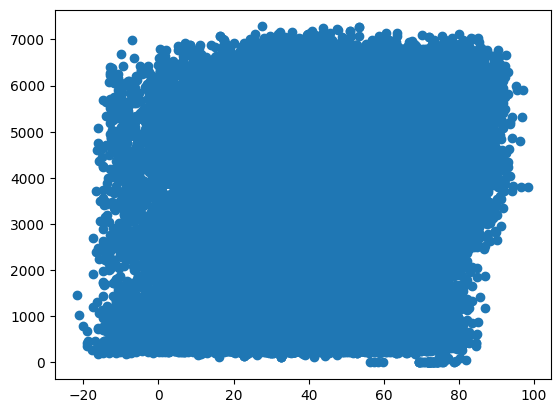

In [55]:
# Let's try that scatterplot again
plt.scatter(traffic['temp'], traffic['traffic_volume'])

In [56]:
# It doesn't look like there's a strong relationship between temperature and traffic volume. Let's look at the correlation between the two
traffic[['temp', 'traffic_volume']].corr()

,temp,traffic_volume
temp,1.000000,0.132291
traffic_volume,0.132291,1.000000


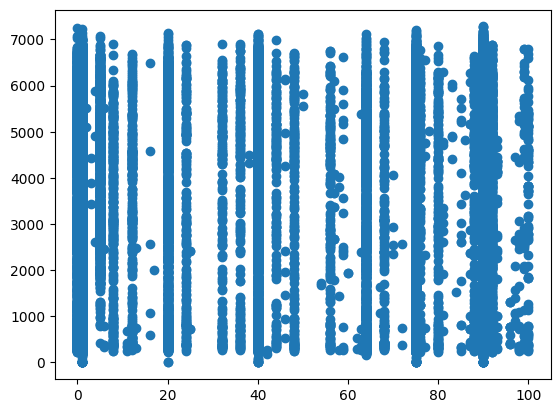

In [58]:
# Pretty low. Let's move on and look at the correlation between traffic volume and other variables. 
# Let's look at traffic volume vs. cloud cover
plt.scatter(traffic['clouds_all'], traffic['traffic_volume'])

In [59]:
# Not much of a correlation here either
traffic[['clouds_all', 'traffic_volume']].corr()

,clouds_all,traffic_volume
clouds_all,1.000000,0.066819
traffic_volume,0.066819,1.000000


In [64]:
traffic['rain_1h'].sort_values(ascending=False).head(40)

24872    9831.30
8247       55.63
7179       44.45
25779      31.75
10806      28.70
10807      28.70
16506      27.57
16505      27.57
16504      27.57
17437      25.46
17438      25.46
17439      25.46
7667       25.32
7668       25.32
7669       25.32
16300      23.80
16301      23.80
16302      23.80
7671       21.42
7670       21.42
7672       21.42
16923      20.24
16924      20.24
16925      20.24
25961      20.07
25964      20.07
25963      20.07
25962      20.07
7664       19.90
7665       19.90
7666       19.90
10734      18.80
25639      18.42
14853      18.03
25481      16.51
7133       16.38
7134       16.38
7135       16.38
7569       16.00
7568       16.00
Name: rain_1h, dtype: float64

In [65]:
# Let's get rid of that outlier by filtering out any rows where the amount of rain is greater than 56
traffic = traffic[traffic['rain_1h'] < 56]

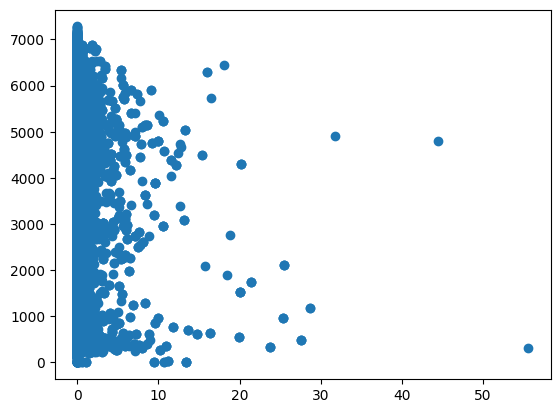

In [66]:
plt.scatter(traffic['rain_1h'], traffic['traffic_volume'])

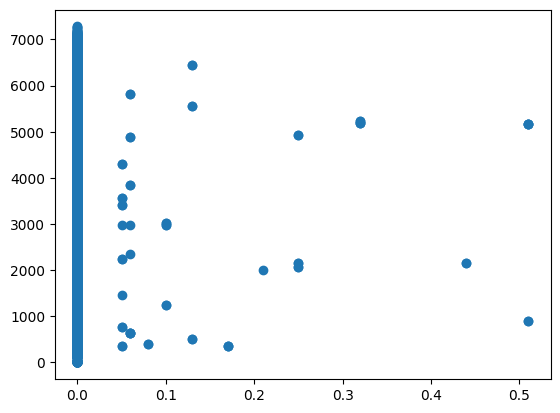

In [67]:
# Let's look at snow as well 
plt.scatter(traffic['snow_1h'], traffic['traffic_volume'])

In [70]:
# Let's simplify the snow data by converting it to a binary variable. If there is any snow, we'll set the value to 1, and 0 otherwise
traffic['snow'] = traffic['snow_1h'].apply(lambda x: 1 if x > 0 else 0)

# Let's do the same with rain
traffic['rain'] = traffic['rain_1h'].apply(lambda x: 1 if x > 0 else 0)

<Axes: title={'center': 'traffic_volume'}, xlabel='rain'>

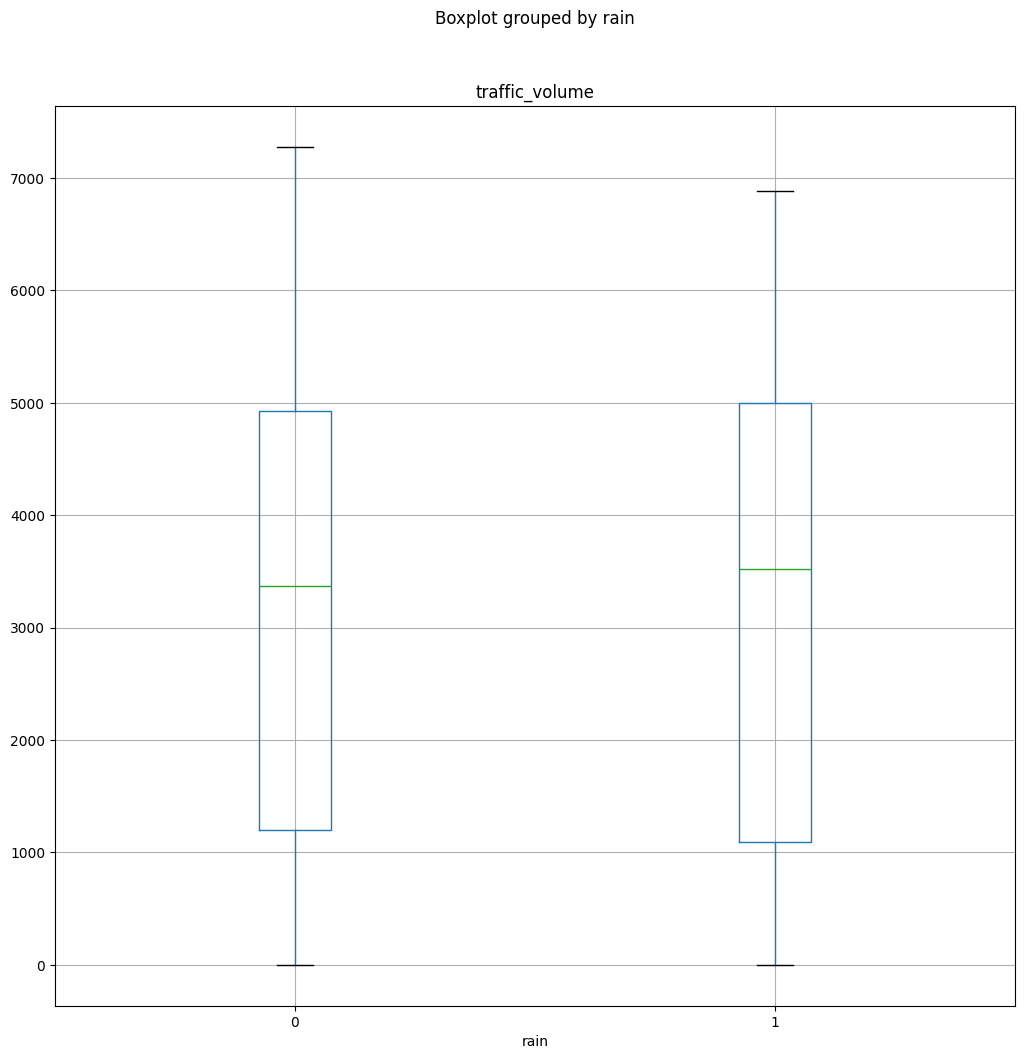

In [71]:
# Now let's look at a boxplot of traffic volume during rain vs. no rain
traffic.boxplot(column='traffic_volume', by='rain', figsize=(12,12))

<Axes: title={'center': 'traffic_volume'}, xlabel='snow'>

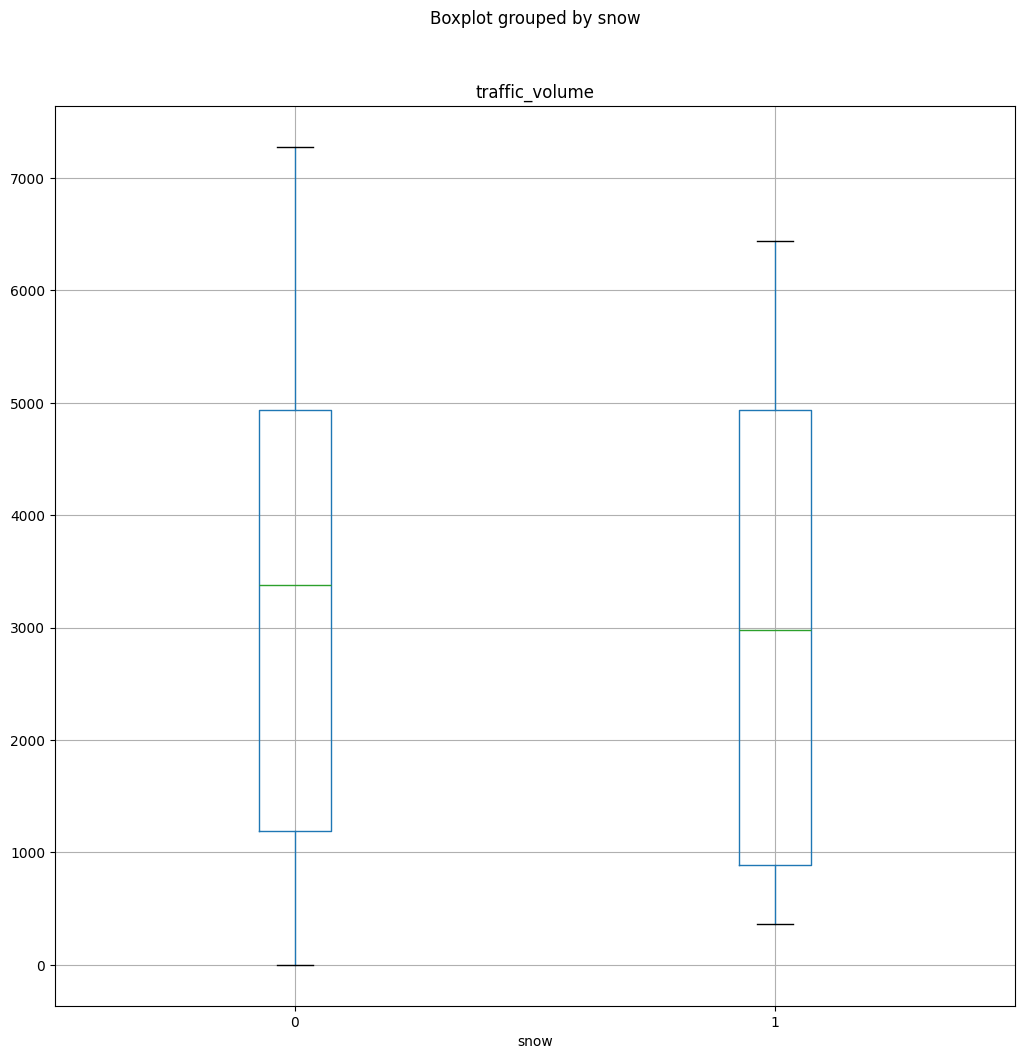

In [72]:
# And now snow vs. no snow
traffic.boxplot(column='traffic_volume', by='snow', figsize=(12,12))

In [73]:
# Not very significant differences here. Let's reevaluate our variables 
traffic.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'weekday', 'hour',
       'rush_hour', 'daylight', 'month', 'year', 'day_of_week', 'snow',
       'rain'],
      dtype='object')

In [74]:
traffic.head(20)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,hour,rush_hour,daylight,month,year,day_of_week,snow,rain
0,NaN,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,morning,0,1,10,2012,1,0,0
1,NaN,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,morning,0,1,10,2012,1,0,0
2,NaN,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,morning,0,1,10,2012,1,0,0
3,NaN,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,afternoon,0,1,10,2012,1,0,0
4,NaN,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,afternoon,0,1,10,2012,1,0,0
5,NaN,65.426,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,1,afternoon,0,1,10,2012,1,0,0
6,NaN,68.036,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584,1,afternoon,1,1,10,2012,1,0,0
7,NaN,69.278,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015,1,afternoon,1,1,10,2012,1,0,0
8,NaN,69.782,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,1,afternoon,1,1,10,2012,1,0,0
9,NaN,67.910,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,1,evening,0,1,10,2012,1,0,0
